# Visualizing Results Interactively
This notebook goes through the process of taking Twitter topic data from 26,000+ tweets and visualizing the results.

1) 3-D Visuzation of Data with PCA:
* Fun tool to visualize how non-distinguishable the topics are

2) Word Clouds
* Show off text that's most common among certain classes

In [2]:
#plotly imports 

import plotly as py 
import plotly.graph_objs as go
from plotly import __version__
#use this format for working locally 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, plot_mpl

init_notebook_mode(connected=True)

print('Plotly version: %s' %(__version__))


#Other Imports
import pandas as pd
import pickle as pkl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import pandas as pd
import pickle

#Visualization
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Plotly version: 3.3.0


In [3]:
# Bring in tsne data from pkl files
filename = './data/LDA_all.pkl'
with open(filename, 'rb') as f:
    tsne_data = pkl.load(f)

In [4]:
# Load set of cleaned text tweets and associated features
path = './data/labeled_cleaned_tweets.csv'
tweet_df = pd.read_csv(path, header=0, index_col=0)

# Tweets with no remaining text after scrubbing are read in as 'nan' values. Replace with empty string.
tweet_df.text = tweet_df.text.fillna(value='')

neither_mask = tweet_df['class'] == 2
hate_mask = tweet_df['class'] == 0
off_mask = tweet_df['class'] ==1

Making this visualization was a lot of fun. It becomes more apparent the more of the negative class is plotted, but the two classes do not separate well. There's plenty of overlap in the 3D space. While it may not be fully representative of a 100+ dimension hyperplane, I do think it's illustrative of why, in order to minimize the number of false negatives, the models produce a fair amount of false positives.  

As far as the visuals go, adding lines to the spheres (giving them a visible edge) really helped to make the shapes pop and give a better sense of depth within 3 dimensions.

In [5]:
# Graphing 3-D reduced data
marker_hate = dict(size=3, symbol='circle',
                  #color='rgb(127, 127, 127)',
                  #color = 'rgb(255, 127, 14)',
                  line=dict(width=1, color='rgba(217, 217, 217, 0.14)'),
                  opacity=0.8)

marker_off = dict(size=3, symbol='circle',
                  #color='rgb(127, 127, 127)',
                  color = 'rgb(255, 127, 14)',
                  #line=dict(width=1, color='rgba(217, 217, 217, 0.14)'),
                  opacity=0.8)
marker_neither = dict(size=3, symbol='circle',
                  color='rgb(127, 127, 127)',
                  #line=dict(color='rgb(204, 204, 204)',width=0.5),
                  opacity=0.8)

trace0 = go.Scatter3d(x = tsne_data[hate_mask,0], y=tsne_data[hate_mask,1], z=tsne_data[hate_mask,2],
                    mode = 'markers',
                     marker = marker_hate,
                     name = 'hate speech')

trace1 = go.Scatter3d(x = tsne_data[off_mask,0], y=tsne_data[off_mask,1], z=tsne_data[off_mask,2],
                    mode = 'markers',
                     marker = marker_off,
                     name = 'offensive')

trace2 = go.Scatter3d(x = tsne_data[neither_mask,0], y=tsne_data[neither_mask,1], z=tsne_data[neither_mask,2],
                    mode = 'markers',
                     marker = marker_neither,
                     name = 'neither')
data=[trace0, trace1, trace2]

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    title = 'Scania Truck Data Reduced to 3 Components',
    xaxis = dict(title = 'PC1', titlefont = dict(size=18)),
    yaxis = dict(title = 'PC2', titlefont = dict(size=18)),
    #zaxis = dict(title = 'PC3', titlefont = dict(size=18))
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='simple-3d-scatter')

# Word Clouds Using the Most Important Classifier Features

Word clouds are definitely a simple tool, but they are effective for showing off text features. The data used here is from LDA topic modelling on 26,000+ tweets.

In [6]:
with open('bestmodel.pkl', 'rb') as f:
    container = pkl.load(f)

lr_cv1 = container['model']
cv1 = container['transformer']

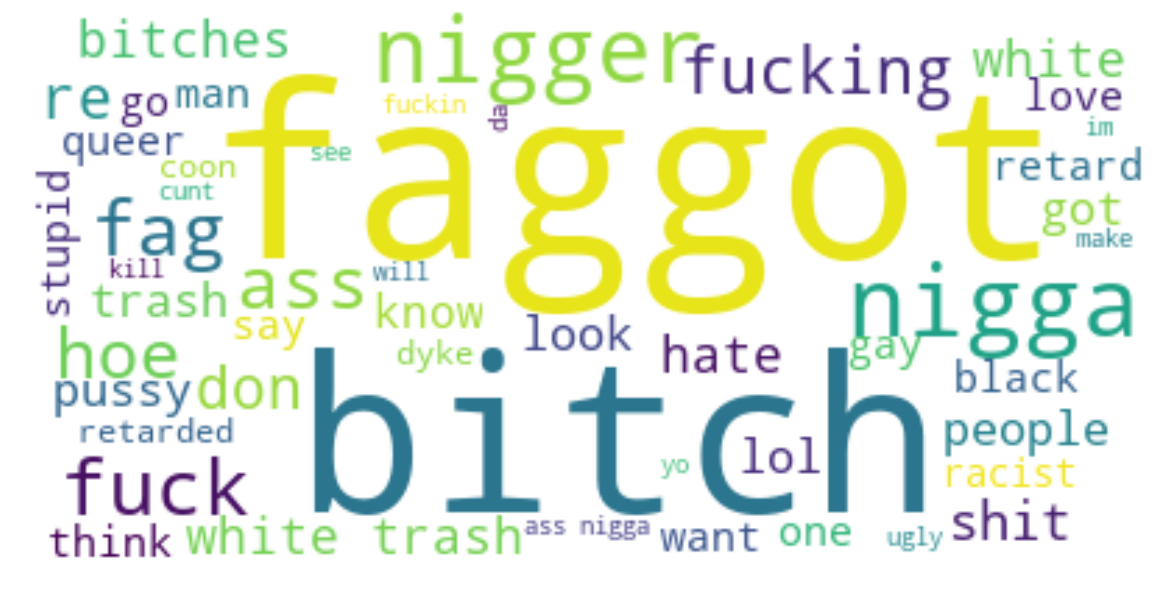

In [7]:
# Create and generate a word cloud image:
wordcloud1 = WordCloud(max_words=1000).generate(' '.join(tweet_df.text))
wordcloud2 = WordCloud(max_words=50, background_color='white').generate(
    ' '.join(tweet_df[tweet_df['class']==0].text))
wordcloud3 = WordCloud(max_words=1000).generate(' '.join(tweet_df[tweet_df['class']==1].text))
wordcloud4 = WordCloud(max_words=1000).generate(' '.join(tweet_df[tweet_df['class']==2].text))

# Display the generated image:
plt.figure(figsize=[20,20])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.savefig('./images_and_presentation/hate_wordcloud.png', format='png')
plt.show()